In [114]:
import matplotlib.pyplot as plt
import pandas as pd
import model
import numpy as np

In [115]:
df = pd.read_csv("c_class_listings.csv")

In [116]:
def to_azn (col):
	if "AZN" in col:
		return float(col.split()[0])
	return float(col.split()[0]) * 1.7

In [117]:
df2 = df[["Year", "Model", "Price", "Mielage", "Fuel type"]].copy()

In [118]:
df2["Price"] = df2["Price"].apply(to_azn)
df2.rename({"Price": "Price_AZN"}, axis="columns", inplace=True)

In [119]:
df2 = df2[df2["Fuel type"] != "Qaz"]
df2.rename({"Fuel type": "Fuel"}, axis="columns", inplace=True)

In [120]:
def remove_km (col):
	return int(col.strip()[:-2].replace(" ", ""))

In [121]:
df2["Mielage"] = df2["Mielage"].apply(remove_km)
df2.rename({"Mielage": "Mileage"}, axis="columns", inplace=True)

In [122]:
test_df = df2.drop("Model", axis=1)
test_df = pd.get_dummies(test_df)
test_df.drop("Fuel_Dizel", axis=1, inplace=True)
df2["Fuel"] = test_df["Fuel_Benzin"].copy()
df2 = df2[df2["Fuel"]]
df2.rename({"Fuel": "isBenzin"}, axis="columns", inplace=True)

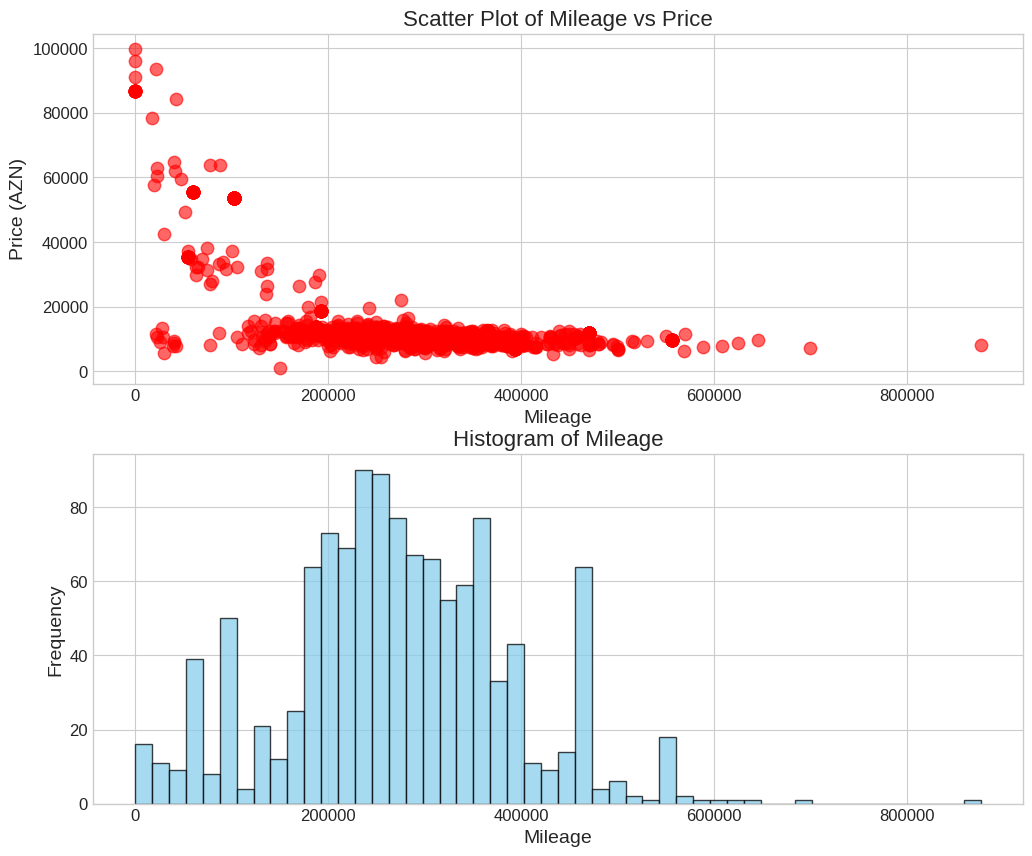

In [123]:
plt.style.use("seaborn-v0_8-whitegrid")

fig, axs = plt.subplots(2, 1, figsize=(12, 10))

axs[0].scatter(df2["Mileage"], df2["Price_AZN"], alpha=0.6, edgecolors="r", s=80, color="r")
axs[0].set_title("Scatter Plot of Mileage vs Price", fontsize=16)
axs[0].set_xlabel("Mileage", fontsize=14)
axs[0].set_ylabel("Price (AZN)", fontsize=14)
axs[0].tick_params(axis="both", which="major", labelsize=12)
axs[0].grid(True)

axs[1].hist(df2["Mileage"], bins=50, alpha=0.75, color="skyblue", edgecolor="black")
axs[1].set_title("Histogram of Mileage", fontsize=16)
axs[1].set_xlabel("Mileage", fontsize=14)
axs[1].set_ylabel("Frequency", fontsize=14)
axs[1].tick_params(axis="both", which="major", labelsize=12)
axs[1].grid(True)

In [124]:
test_model = model.LinearRegression(0.01,1000)

In [125]:
x=np.array([test_df["Year"]])
y=np.array([test_df["Price_AZN"]])

In [126]:
test_model.fit(x,y)

/home/rajab/Desktop/LinearRegressionInPY/model.py:18: RuntimeWarning: overflow encountered in multiply
  # Normalize the features and target
/home/rajab/Desktop/LinearRegressionInPY/model.py:22: RuntimeWarning: invalid value encountered in scalar subtract
  self.y_std = np.std(y)
/home/rajab/Desktop/LinearRegressionInPY/model.py:23: RuntimeWarning: invalid value encountered in scalar subtract
  


(np.float64(nan), np.float64(nan))